In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 11 12:29:48 2019

@author: SLab"
"""
import tensorflow as tf
import keras.callbacks
#import sys
import os
import pandas
from keras import backend as K
from keras.utils.vis_utils import plot_model
from keras import optimizers
from keras.models import Sequential
from keras.layers import  Dropout
#import keras
from scipy import interp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.utils.vis_utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from subprocess import check_output
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation

import os, re, csv, math, codecs
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import time
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# Helping Functions

In [3]:
def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall))

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

# auc = roc_auc_score(testy, yhat_probs)

from sklearn.metrics import cohen_kappa_score
def kappa(y_true, y_pred):
    cohen_kappa_score(y_true, y_pred)


# Metrics Class

In [4]:
# ==============================================================================
class Metrics(keras.callbacks.Callback):
    def __init__(self, val_data, batch_size = 250):
      super().__init__()
      self.validation_data = val_data
      self.batch_size = batch_size
    def on_train_begin(self, logs={}):
        self.confusion = []
        self.precision = []
        self.recall = []
        self.f1s = []
        self.kappa = []
        self.auc = []

    def on_epoch_end(self, epoch, logs={}):
      keys = list(logs.keys())
      print("End epoch {} of training; got log keys: {}".format(epoch, keys))
      # print('type(self.validation_data)',type(self.validation_data))
      score = np.asarray(self.model.predict(self.validation_data[0]))
      predict = np.round(np.asarray(self.model.predict(self.validation_data[0])))
      # predict2 = np.asarray(self.model.predict(self.validation_data[0]))
      # print("#######y_predict2s#####")
      # print(predict2)
      # print("#######y_predict#####")
      # print(predict)
      # targ = self.validation_data[1]
      # print("#######targ#####")
      # print(targ)
      # y_test_non_category = [ np.argmax(t) for t in targ ]
      # y_predict_non_category = [ np.argmax(t) for t in predict ]
      # y_predict_non_category2 = [ np.amax(t) for t in predict2 ]
      # print("#######y_predict_non_category2#####")
      # print(y_predict_non_category2)
      # print("#######y_test_non_category#####")
      # print(y_test_non_category)
      # conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)
      # print("########confusion_matrics########")
      # print(conf_mat)
        #self.auc.append(sklm.roc_auc_score(targ, score))
#==============================================================================
#       self.confusion.append(confusion_matrix(y_test_non_category, y_predict_non_category))
#       print("confusion_matrics 2")
#       print(self.confusion)
#       
#==============================================================================
#       report = classification_report(y_test_non_category,  y_predict_non_category, target_names=label_names)
#       print("########classification report########")
#       print(report) 
      
#       # false positive rate and true positive rate
#       fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_non_category,  y_predict_non_category)
#       auc_keras = auc(fpr_keras, tpr_keras)
#       self.auc.append(auc_keras)
#       self._data.append({
#             'val_auc': roc_auc_score(y_val, y_predict),
#             'val_fpr': fpr_keras,
#             'val_tpr': trp_keras,
#         })
#       print("########ROC##########")
#       print(auc_keras) 
#       #self.classification_report.append(classification_report(y_test_non_category,  y_predict_non_category, target_names=label_names))
#       self.precision.append(precision_score(y_test_non_category, y_predict_non_category,average='weighted'))
#       self.recall.append(recall_score(y_test_non_category, y_predict_non_category,average='weighted'))
#       #auc_PRC = auc(self.recall, self.precision)
# #==============================================================================
#       precision1, recall1, thresholds1 = precision_recall_curve(y_test_non_category, y_predict_non_category)
#       print("########PRC##########")
#       auc_PRC= auc(recall1, precision1)
#       print(auc_PRC)
# #==============================================================================
#  # Compute ROC curve and ROC area for each class
#       fpr = dict()
#       tpr = dict()
#       roc_auc = dict()
#       n_classes=2
#       for i in range(n_classes):
#           fpr[i], tpr[i], _ = roc_curve(targ[:, i], predict[:, i])
#           roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
#       fpr["micro"], tpr["micro"], _ = roc_curve(targ.ravel(), predict.ravel())
#       roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Compute macro-average ROC curve and ROC area

# # First aggregate all false positive rates
#       all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# # Then interpolate all ROC curves at this points
#       mean_tpr = np.zeros_like(all_fpr)
#       for i in range(n_classes):
#           mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# # Finally average it and compute AUC
#       mean_tpr /= n_classes

#       fpr["macro"] = all_fpr
#       tpr["macro"] = mean_tpr
#       roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
#       print("########ROC_MAC##########")
#       print(roc_auc) 
#       n_classes=2
#       precision = dict()
#       recall = dict()
#       average_precision = dict()
#       for i in range(n_classes):
#             precision[i], recall[i], _ = precision_recall_curve(targ[:, i],
#                                                                 predict[:, i])
#             average_precision[i] = average_precision_score(targ[:, i], predict[:, i])
        
#         # A "micro-average": quantifying score on all classes jointly
#       precision["micro"], recall["micro"], _ = precision_recall_curve(targ.ravel(),
#             predict.ravel())
#       average_precision["macro"] = average_precision_score(targ, predict,
#                                                              average="macro")
#       average_precision["micro"] = average_precision_score(targ, predict,
#                                                              average="micro")
#       average_precision["weighted"] = average_precision_score(targ, predict,
#                                                              average="weighted")
#       print('Average precision score, Macro-averaged over all classes: {0:0.5f}' .format(average_precision["macro"]))
#       print('Average precision score, Micro-averaged over all classes: {0:0.5f}' .format(average_precision["micro"]))
#       print('Average precision score, Weighted-averaged over all classes: {0:0.5f}' .format(average_precision["weighted"]))
      
      return
# ==============================================================================


# Training

In [ ]:
# df= pd.read_csv("./citation_data/final_data_citations_M.csv")

In [ ]:
# df_train = df.iloc[:8518,:]

In [ ]:
# df_test = df.iloc[8519:,:]

In [ ]:
# df_train.to_csv("final_data_citations_M_train.csv", index=False)

In [ ]:
# df_test.to_csv("final_data_citations_M_test.csv", index=False)

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
data_dir = '/content/drive/My Drive/Thesis'

loading word embeddings...


111052it [00:24, 4561.67it/s] 
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


found 111052 word vectors
num train:  8518
num test:  999
####################################################
219
####################################################


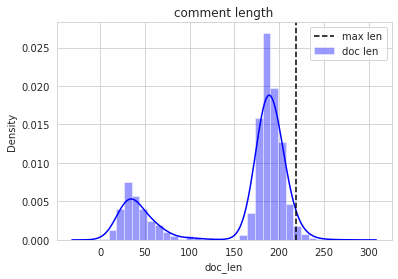

pre-processing train data...


100%|██████████| 999/999 [00:00<00:00, 68111.93it/s]


tokenizing input data...
dictionary size:  25516
preparing embedding matrix...
number of null word embeddings: 12772
sample words not found:  ['contraints' 'computerised' 'nfinite' 'finalâ' '2319' 'venient'
 'helpfulness1' 'pdel' 'applicative' 'formularized']
training CNN for Multiple classes...


In [9]:
from tensorflow import keras
from keras.utils import pad_sequences
sns.set_style("whitegrid")
np.random.seed(0)

#DATA_PATH = '../input/'
#EMBEDDING_DIR = '../input/'

MAX_NB_WORDS = 100000
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('acc'))
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

def focal_loss(y_true, y_pred):
    gamma = 1.0 
    alpha = 0.25
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))


#print(check_output(["ls", "../input"]).decode("utf8"))
#print(check_output(["ls", "../input"]).decode("utf8"))
print('loading word embeddings...')
embeddings_index = {}

f = codecs.open(data_dir + '/Embeddings/wiki.simple.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))
train_df = pd.read_csv(data_dir + '/Data/Thesis_ACA_citation_data' + '/final_data_citations_M_train.csv', sep=',', header=0,encoding = "ISO-8859-1")
test_df = pd.read_csv(data_dir + '/Data/Thesis_ACA_citation_data' + '/final_data_citations_M_test.csv', sep=',', header=0,encoding = "ISO-8859-1")
test_df = test_df.fillna('_NA_')

print("num train: ", train_df.shape[0])
print("num test: ", test_df.shape[0])

label_names = ["background", "compareorcontrast","extends","uses","motivation","future","none"]
y_train = train_df[label_names].values

#visualize word distribution
train_df['doc_len'] = train_df['text'].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(train_df['doc_len'].mean() + train_df['doc_len'].std()).astype(int)

print("####################################################")
print(max_seq_len)
#==============================================================================
sns.distplot(train_df['doc_len'], hist=True, kde=True, color='b', label='doc len')
print("####################################################")
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('comment length'); plt.legend()
plt.show()
#==============================================================================

raw_docs_train = train_df['text'].tolist()
raw_docs_test = test_df['text'].tolist() 
num_classes = len(label_names)



print("pre-processing train data...")
processed_docs_train = []
for doc in tqdm(raw_docs_train):
    tokens = tokenizer.tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_train.append(" ".join(filtered))
#end for

processed_docs_test = []
for doc in tqdm(raw_docs_test):
    tokens = tokenizer.tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_test.append(" ".join(filtered))
#end for

print("tokenizing input data...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(processed_docs_train + processed_docs_test)  #leaky
word_seq_train = tokenizer.texts_to_sequences(processed_docs_train)
word_seq_test = tokenizer.texts_to_sequences(processed_docs_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

#pad sequences
word_seq_train = pad_sequences(word_seq_train, maxlen=max_seq_len)
word_seq_test = pad_sequences(word_seq_test, maxlen=max_seq_len)

random_state = np.random.RandomState(0)
X_train, X_test, Y_train, Y_test = train_test_split(word_seq_train, y_train, test_size=.2,
                                                    random_state=random_state)

#print (X_test)
#print("########################")
#print(Y_test)

batch_size = 256 
num_epochs = 30 

#model parameters
num_filters = 64 
embed_dim = 300 
weight_decay = 1e-3

#embedding matrix --------------------------------------> (mapping fastText embeddings to our words)
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index)+2)
embedding_matrix = np.zeros((nb_words, embed_dim))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

print("sample words not found: ", np.random.choice(words_not_found, 10))


print("training CNN for Multiple classes...")
model = Sequential()
model.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(num_classes, activation='sigmoid'))  #multi-label (k-hot encoding)



In [10]:
history = LossHistory()
time_callback = TimeHistory()
#metrics = Metrics()
adam = keras.optimizers.Adam(lr=0.001)
# adam = optimizers.Adam(lr=0.001)
#, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0
model.compile(loss=[focal_loss], optimizer=adam, metrics=['accuracy',precision,recall,f1])
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 219, 300)          7655400   
                                                                 
 conv1d (Conv1D)             (None, 219, 64)           134464    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 109, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 109, 64)           28736     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0

In [12]:
pandas.DataFrame( model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                                  batch_size=250, epochs=100, shuffle=True, verbose=2, callbacks=[history,time_callback]).history).to_csv(data_dir + "/Data/results_Feb_2023/Aljohani.csv")
#==============================================================================


Epoch 1/100


28/28 - 1s - loss: 2.8753 - accuracy: 0.9921 - precision: 0.9971 - recall: 0.9826 - f1: 0.9898 - val_loss: 164.6490 - val_accuracy: 0.7529 - val_precision: 0.7980 - val_recall: 0.6955 - val_f1: 0.7431 - 707ms/epoch - 25ms/step
Epoch 2/100
28/28 - 1s - loss: 2.5290 - accuracy: 0.9935 - precision: 0.9972 - recall: 0.9804 - f1: 0.9888 - val_loss: 197.3939 - val_accuracy: 0.7471 - val_precision: 0.7836 - val_recall: 0.7015 - val_f1: 0.7403 - 574ms/epoch - 20ms/step
Epoch 3/100
28/28 - 1s - loss: 2.6326 - accuracy: 0.9922 - precision: 0.9968 - recall: 0.9826 - f1: 0.9896 - val_loss: 167.4086 - val_accuracy: 0.7576 - val_precision: 0.8012 - val_recall: 0.6838 - val_f1: 0.7378 - 573ms/epoch - 20ms/step
Epoch 4/100
28/28 - 1s - loss: 2.4464 - accuracy: 0.9924 - precision: 0.9965 - recall: 0.9815 - f1: 0.9889 - val_loss: 145.0865 - val_accuracy: 0.7406 - val_precision: 0.8033 - val_recall: 0.6608 - val_f1: 0.7250 - 567ms/epoch - 20ms/step
Epoch 5/100
28/28 - 1s - loss: 3.0537 - accuracy: 0.9908

In [13]:
X_test[0,:]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   810,    20,   243,  2000,
        3642,   378,   280,  2813,    11,    38,   361,  4139,  5530,
          65,   451,    11,    38,   591,   538,  1198,    41,  2080,
          11,    38,  4321, 10706,  1593, 10707, 10708,   178,    14,
         796,  4022,    31,   145,  2224,  5184,   811,  1265,    56,
           4,     8,

In [19]:
print((y_pred_bool.reshape((999,1))).shape)

(999, 1)


In [20]:
print(submission_df[label_names].shape)

(999, 1)


In [21]:
y_pred = model.predict(word_seq_test, batch_size=256, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
label_names = ["Predicted_Class"]

submission_df = pd.DataFrame(columns=['ID'] + label_names)
submission_df['ID'] = test_df['ID'].values
submission_df[label_names] = y_pred_bool.reshape((999,1))

submission_df.to_csv("./cnn_fasttext_NRPUsubmission_multi_feb2023.csv", index=False)
print(y_pred)

4/4 [==============================] - 0s 8ms/step
[[9.4705671e-01 7.1298927e-03 6.1119259e-05 ... 8.7550905e-04
  3.5590005e-05 2.8750054e-03]
 [6.3605046e-01 2.0568948e-03 2.6310331e-03 ... 1.6613835e-03
  1.6616920e-03 2.1413197e-01]
 [6.3605046e-01 2.0568948e-03 2.6310331e-03 ... 1.6613835e-03
  1.6616920e-03 2.1413197e-01]
 ...
 [1.0137520e-02 4.1639083e-03 1.3930418e-02 ... 2.4698079e-03
  2.8767062e-03 1.0733748e-03]
 [1.6829574e-01 4.3744375e-03 6.6948487e-06 ... 7.9982376e-05
  6.6648636e-06 2.4395162e-01]
 [3.9702597e-01 5.8296103e-02 2.5333792e-03 ... 1.0458337e-03
  6.4640812e-04 2.1639781e-02]]


In [22]:
data_dir = '/content/drive/My Drive/Thesis'
fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5, forward=True)
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [23]:
aljohani = pd.read_csv(data_dir+"/Data/results_Feb_2023/Aljohani.csv")


In [ ]:
# aljohani

In [24]:
proposed_model = pd.read_csv(data_dir+"/Data/results_March_2022/proposed_model.csv")

In [25]:
# proposed_model

####################################################


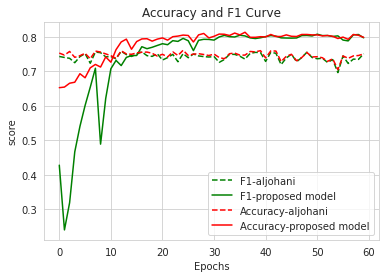

In [26]:
#==============================================================================
# plt.figure(figsize=(10,10))
sns.lineplot(data=aljohani['val_f1'][:60], linestyle='--', color='g', label='F1-aljohani')
sns.lineplot(data=proposed_model['val_f1'][:60], color='g', label='F1-proposed model')
sns.lineplot(data=aljohani['val_accuracy'][:60], linestyle='--', color='r', label='Accuracy-aljohani')
sns.lineplot(data=proposed_model['val_accuracy'][:60], color='r', label='Accuracy-proposed model')
print("####################################################")
plt.title('Accuracy and F1 Curve')
plt.xlabel("Epochs")
plt.ylabel("score")
plt.legend()
plt.savefig('Accuracy and F1 Curve aljohani_vs_proposed_FEB2023.png', dpi=300, bbox_inches='tight')
plt.show()
#==============================================================================